In [1]:
!pip install keras

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------- -------------- 30.7/48.7 kB 1.3 MB/s eta 0:00:01
     ------------------------------- ------ 41.0/48.7 kB 487.6 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 409.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.2 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.2 MB 1.3 MB/s eta 0:00:01
   ------ --------------------------------- 0.2/1.2 MB 1.6 MB/s eta 0:00:01
   ------- -------------------------------- 0.2/1.2 MB 1.3 MB/s eta 0:00:01
   ----------- ---------------------------- 0.3/1.2 MB 1.6 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.2 MB 1.3 MB/s eta 0:00:01
   ----------------- ---------------------- 0.5/1.2 MB 1.7 MB/s eta 0:00:01
   --------------------- ------------------ 0.6/1.2 MB 1.8 MB/s eta 0:00:01
   ---------------

In [5]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

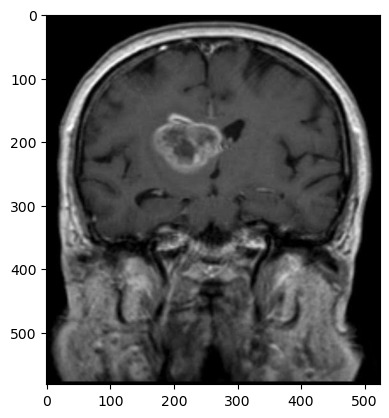

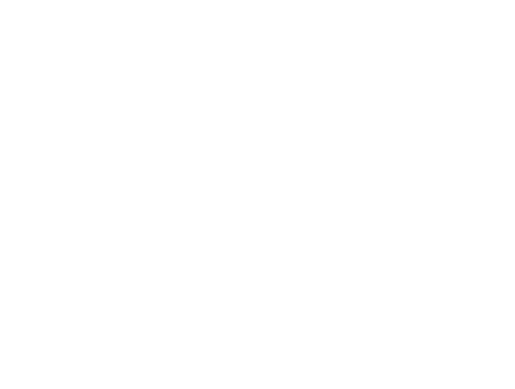

In [7]:
import matplotlib.pyplot as plt
import cv2
DATADIR = "c:/python/brain/"
CATEGORIES = ["Glioma","Meningioma","No tumor","Pituitary"]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        plt.axis("off")
        break
    break

(-0.5, 149.5, 149.5, -0.5)

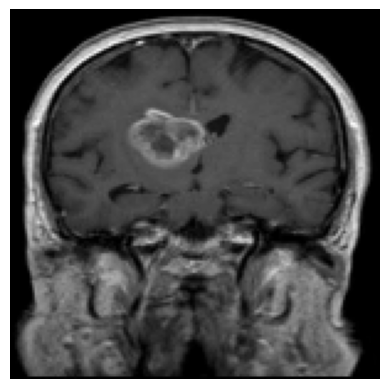

In [9]:
IMG_SIZE = 150
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))    
plt.imshow(new_array,cmap = "gray")
plt.axis("off")

In [11]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)

In [13]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [15]:
X = []
y = []
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE)
print(X.shape)
X = X/255.0  
X = X.reshape(-1,150,150,1)

(32, 150, 150)


In [23]:
!pip install tensorflow

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB 1.3 MB/s eta 0:05:05
   ---------------------------------------- 0.1/390.3 MB 812.7 kB/s eta 0:08:01
   ---------------------------------------- 0.1/390.3 MB 1.0 MB/s eta 0:06:21
   ---------------------------------------- 0.2/390.3 MB 1.2 MB/s eta 0:05:15
   ---------------------------------------- 0.3/390.3 MB 1.3 MB/s eta 0:04:59
   ---------------------------------------- 0.3/390.3 MB 1.3 MB/s eta 0:04:58
   ---------------------------------------- 0.4/390.3 MB 1.4 MB/s eta 0:04:43
   ---------------------------------------- 0.5/390.3 MB 1.4 MB/s eta 0:04:45
   ---------------------------------------- 0.7/390.3 MB 1.7 MB/s eta 0:03:53
   ---------------------------------------- 0.9/390.3 MB 2.0 MB/s eta 0:03:14
   ---------------------------------------- 1.0/390.3 MB 2.1 MB/s eta 0:03:09
   ---------------------------------------- 1.2/390.3 MB 2.2 MB/s eta

In [32]:
!pip show tensorflow keras

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\ASUS\anaconda3\Lib\site-packages
Requires: tensorflow-intel
Required-by: 
---
Name: keras
Version: 3.7.0
Summary: Multi-backend Keras
Home-page: 
Author: 
Author-email: Keras team <keras-users@googlegroups.com>
License: Apache License 2.0
Location: C:\Users\ASUS\anaconda3\Lib\site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow_intel


In [50]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes = 4)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.2, random_state=42)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (25, 150, 150, 1)
x_test shape (7, 150, 150, 1)
y_train shape (25, 4)
y_test shape (7, 4)


In [79]:
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (150,150,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
epochs = 50  
batch_size = 40

In [89]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0,
        zoom_range = 0,
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=True,  
        vertical_flip=False)

In [93]:
datagen.fit(X_train)
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_val, Y_val),
    steps_per_epoch=X_train.shape[0] // batch_size)

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.3200 - loss: 1.3774 - val_accuracy: 0.0000e+00 - val_loss: 1.5296
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2800 - loss: 1.6060 - val_accuracy: 0.1429 - val_loss: 1.3696
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2800 - loss: 1.4042 - val_accuracy: 0.2857 - val_loss: 1.3762
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2000 - loss: 1.4045 - val_accuracy: 0.1429 - val_loss: 1.3931
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2800 - loss: 1.3746 - val_accuracy: 0.0000e+00 - val_loss: 1.4120
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3600 - loss: 1.3496 - val_accuracy: 0.0000e+00 - val_loss: 1.4318
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3200 - loss: 1.3306 - val_accuracy: 0.0000e+00 - val_loss: 1.4483
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3200 - loss: 1.3205 - val_accuracy: 0.0000e+00 - val_loss: 1

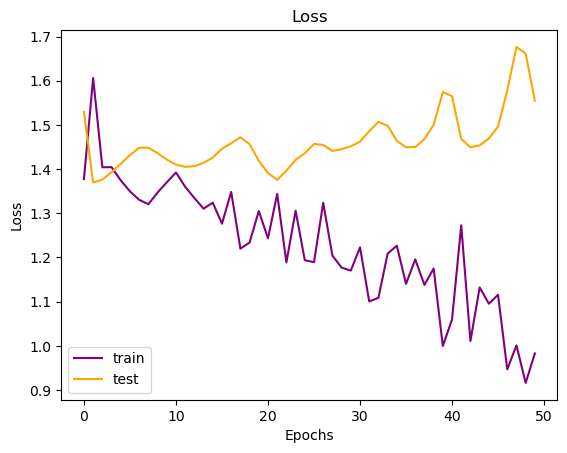

In [95]:
plt.plot(history.history["loss"],c = "purple")
plt.plot(history.history["val_loss"],c = "orange")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

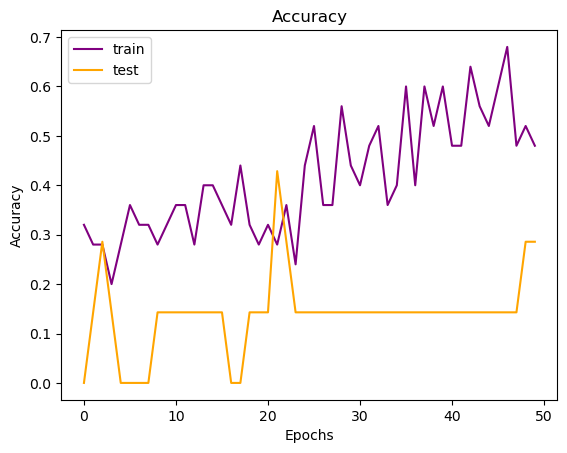

In [97]:
plt.plot(history.history["accuracy"],c = "purple")
plt.plot(history.history["val_accuracy"],c = "orange")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()